In [101]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq, fftfreq, fft

SAMPLE_RATE = 1  # Hertz 
HIGHER_SAMPLE_RATE = 4100 # Hertz 
RESOLUTION = 4 # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

### 1Hz Sine Wave.
First we begin by generating a 1Hz Sine Wave, which we can plot over 5s with a 8Hz Sampling Rate as shown below.

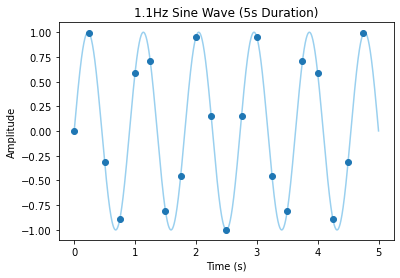

In [111]:
WAVE_FREQUENCY = 1.1 #hz

# Generate a 1 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(WAVE_FREQUENCY, RESOLUTION, DURATION)
x_clean, y_clean = generate_sine_wave(WAVE_FREQUENCY, HIGHER_SAMPLE_RATE, DURATION)

# Plot
plt.scatter(x, y, zorder=5)
plt.plot(x_clean, y_clean, color="#9AD0EF", zorder=4)
plt.title('1.1Hz Sine Wave (5s Duration)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig("image_1_1-1hz_time_domain.jpg", dpi=1200)
plt.show()

We can apply the fourier transformation to this 1Hz Wave, yielding two frequencies (-1Hz and 1Hz), as shown to be equal and opposite of the Nyquist Limit. 

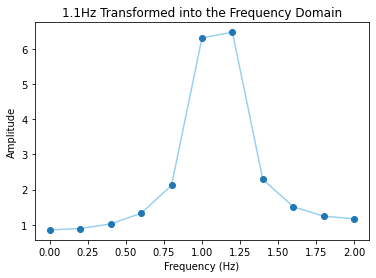

In [114]:
# Number of samples in normalized_tone
N = RESOLUTION * DURATION

normalized_y_tone = np.int16((y / y.max()) * 32767)

yfreq = rfft(y)
xfreq = rfftfreq(N, 1 / RESOLUTION)

# Plot first 50 Frequencies. Notice spikes at 1 and 3.
plt.scatter(xfreq, np.abs(yfreq), zorder=5)
plt.plot(xfreq, np.abs(yfreq), color="#9AD0EF", zorder=4)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("1.1Hz Transformed into the Frequency Domain")
plt.savefig("image_2_1-1hz_frequency_domain.jpg", dpi=1200)
plt.show()

What if we were to mix sine waves?
Below, we generate a 2Hz and a 5Hz Sine wave, compounding them together.

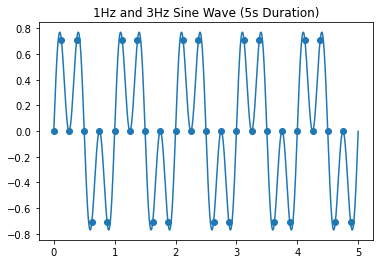

In [85]:
# Mixing 2Hz and 5Hz Sine Waves  
_x, nice_tone = generate_sine_wave(1, SAMPLE_RATE, DURATION)
_x2, noise_tone = generate_sine_wave(3, SAMPLE_RATE, DURATION)
# noise_tone = noise_tone * 0.3

mixed_tone = (nice_tone + noise_tone) / 2
_total = (_x + _x2) / 2

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

### Generating Graph Aid - Begin
_x_2, nice_tone_2 = generate_sine_wave(1, HIGHER_SAMPLE_RATE, DURATION)
_x2_2, noise_tone_2 = generate_sine_wave(3, HIGHER_SAMPLE_RATE, DURATION)
mixed_tone_2 = (nice_tone_2 + noise_tone_2) / 2
_total_2 = (_x_2 + _x2_2) / 2
normalized_tone_2 = np.int16((mixed_tone_2 / mixed_tone_2.max()) * 32767)
### Generating Graph Aid - End

plt.scatter(_total, mixed_tone)
plt.plot(_total_2, mixed_tone_2)
plt.plot()
plt.title('1Hz and 3Hz Sine Wave (5s Duration)')
plt.savefig("image_2_1hz_and_3hz.jpg", dpi=1200)
plt.show()

In [86]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

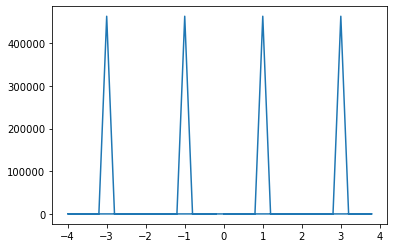

In [87]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

# Plot first 50 Frequencies. Notice spikes at 1 and 3.
plt.plot(xf[:50], np.abs(yf[:50]))
plt.show()

In [79]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

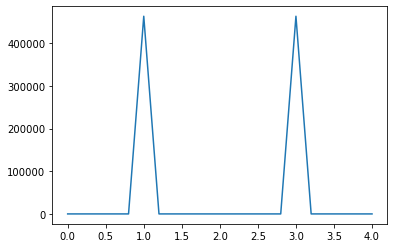

In [80]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf[:50], np.abs(yf[:50]))
plt.show()

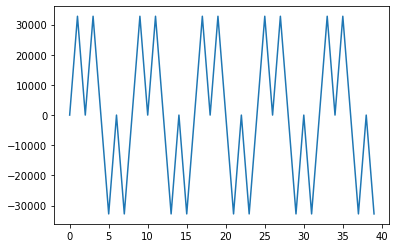

In [81]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig) # [:1000]
plt.show()

In [82]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)